In [1]:
# imported python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import itertools

In [2]:
# load the data
data = pd.read_csv('creditcard.csv')

In [3]:
# check the shape of the data
print(data.shape)

(284807, 31)


In [4]:
# check the first few rows of the data
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# check the statistical summary of the data
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
# check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# check for duplicate values
print(data.duplicated().sum())

1081


In [8]:
# Scaling Amount and Time

# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
# adding scaled data to the main dataframe
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

## Random Undersampling

In [10]:

# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
81164,-0.039125,-0.304057,-1.291863,0.536591,2.241017,0.209657,-0.659887,-0.082839,-0.260098,0.377741,...,-0.146990,0.069765,0.326659,-0.285332,0.597548,-0.388894,0.185641,-0.355130,-0.276800,0
41943,-0.296793,-0.514574,-2.140511,4.104871,-8.996859,4.028391,-5.131359,-4.153568,-9.360095,1.922075,...,1.725578,1.854267,-0.165534,-0.339939,0.296314,1.364225,-0.518996,2.352333,1.130625,1
276210,0.311605,0.966470,1.897692,-0.550364,-0.519870,0.410236,-0.459159,-0.076352,-0.386523,0.062779,...,-0.118105,-0.516227,-1.301205,0.406479,-0.343183,-0.572961,0.103846,-0.047066,-0.055460,0
9509,-0.293440,-0.828722,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1
150662,4.108992,0.107626,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,...,0.055684,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,1


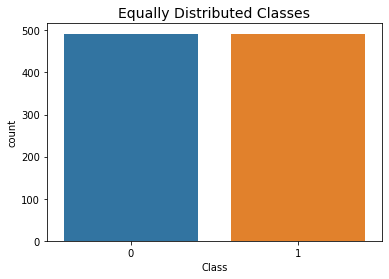

In [11]:
# Histogram plot of fraud and non-fraud class. Both have equal distribution
sns.countplot(data=new_df, x="Class")
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

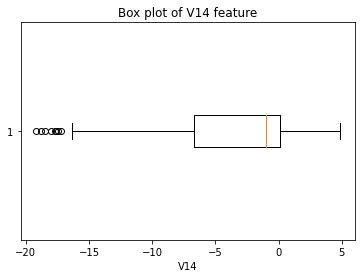

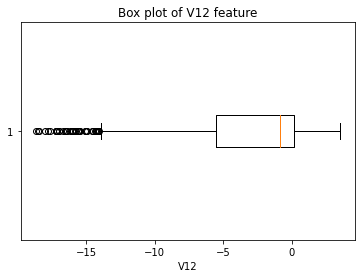

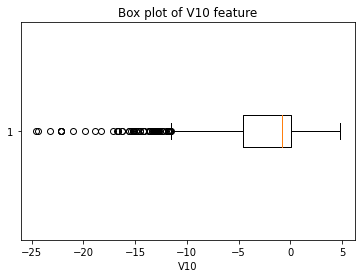

In [12]:
# boxplot for V14
plt.boxplot(new_df['V14'], vert=False)
plt.xlabel('V14')
plt.title('Box plot of V14 feature')
plt.show()

# boxplot for V12

plt.boxplot(new_df['V12'], vert=False)
plt.xlabel('V12')
plt.title('Box plot of V12 feature')
plt.show()

# boxplot for v10

plt.boxplot(new_df['V10'], vert=False)
plt.xlabel('V10')
plt.title('Box plot of V10 feature')
plt.show()

#### There are outliers in these features. These outliers are taken out by applying the formula using IQR, which determined the cut off for excluding outliers.

In [13]:
# V14 Removing Outliers
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]


In [14]:
# V12 removing outliers 
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)

V12 outliers: [-18.0475965708216, -18.5536970096458, -18.4311310279993, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4


In [15]:
# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

V10 outliers: [-15.5637913387301, -16.6011969664137, -22.1870885620007, -16.6496281595399, -19.836148851696, -22.1870885620007, -15.5637913387301, -24.5882624372475, -20.9491915543611, -18.2711681738888, -17.1415136412892, -16.2556117491401, -16.7460441053944, -15.1237521803455, -14.9246547735487, -22.1870885620007, -23.2282548357516, -18.9132433348732, -15.2318333653018, -14.9246547735487, -15.1241628144947, -15.3460988468775, -22.1870885620007, -24.4031849699728, -16.3035376590131, -15.2399619587112, -15.2399619587112]
Feature V10 Outliers for Fraud Cases: 27


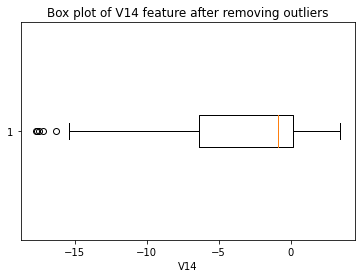

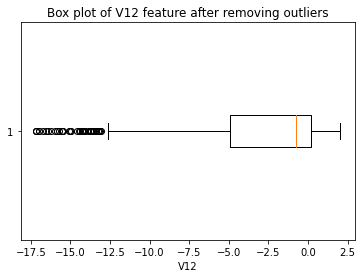

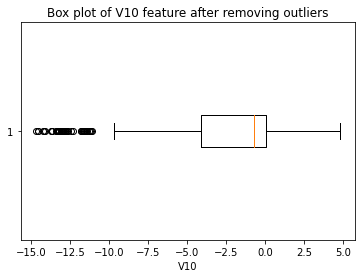

In [16]:
# boxplot for V14
plt.boxplot(new_df['V14'], vert=False)
plt.xlabel('V14')
plt.title('Box plot of V14 feature after removing outliers')
plt.show()

# boxplot for V12

plt.boxplot(new_df['V12'], vert=False)
plt.xlabel('V12')
plt.title('Box plot of V12 feature after removing outliers')
plt.show()

# boxplot for v10

plt.boxplot(new_df['V10'], vert=False)
plt.xlabel('V10')
plt.title('Box plot of V10 feature after removing outliers')
plt.show()

#### Thus, the skewness has been decreased and the extreme features won't affect the model.

## Dimesionality Reduction and Clustering

In [17]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

/home/shashwat/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shashwat/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


T-SNE took 1.9 s


In [18]:
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.063 s


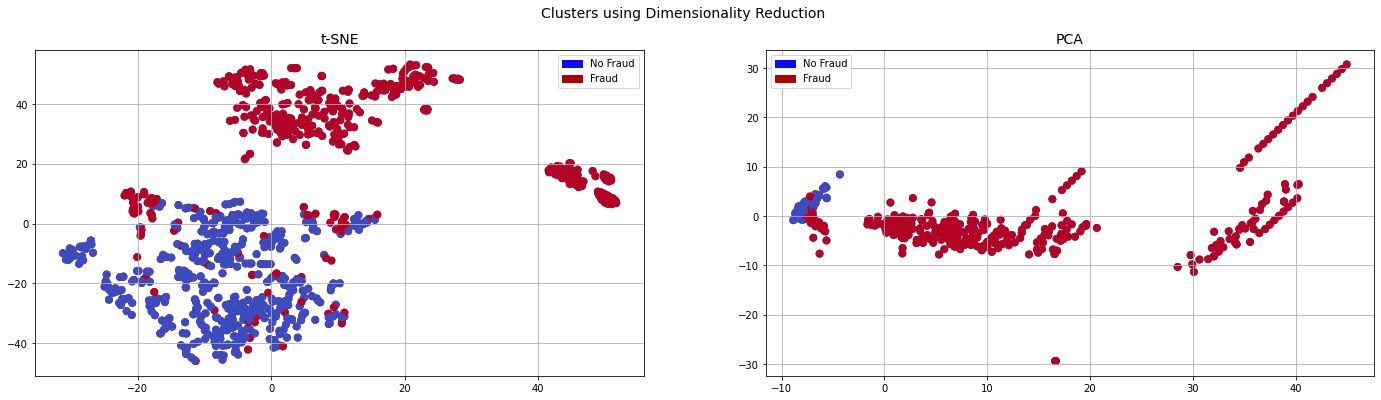

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

#### The t-sne plot shows that it is successful in differentiating between Class variable and make clusters accordingly. Thus, models should be able to predict the test dataset accurately.

## Random Oversampling


Random over-sampling:
0    284315
1    284315
Name: Class, dtype: int64


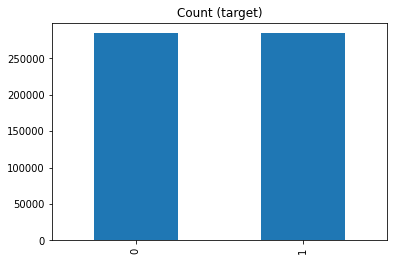

In [20]:
# Class count
count_class_0, count_class_1 = data.Class.value_counts()
# Divide by class
df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

df_test_over.Class.value_counts().plot(kind='bar', title='Count (target)');

In [21]:
# Saved the dataframe as a csv file
df_test_over.to_csv('df_test_over.csv',index=False)

In [22]:
# Saved the dataframe as a csv file
new_df.to_csv('new_df.csv',index=False)

In [23]:
# Saved the dataframe as a csv file
data.to_csv('data.csv',index=False)